In [75]:
# STEP 1 -  의존성 로드 ############################################################
import numpy as np
import pandas as pd
import os
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import seaborn as sns # seaborn ref : https://greeksharifa.github.io/machine_learning/2019/12/05/Seaborn-Module/
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import statsmodels.api as sm;
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process.kernels import RBF
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt # plotting
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
## 정확도 지표 정의
def metrics(y_test,pred):
    print("ACC : ",accuracy_score(y_test,pred))
    print("Precision : ", precision_score(y_test,pred))
    print("recall(TP rate) : ", recall_score(y_test,pred))
    print("F1 : " , f1_score(y_test,pred))
    print("ROC SCORE : ", roc_auc_score(y_test,pred,average="macro"))


%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

In [76]:
df = pd.read_csv('2018_17_16_OUTCOME.csv')
Y = df.HE_DM # y축 설정
X = df.drop(columns=["HE_DM"]) #결과축 삭제 for predictions
pipe = Pipeline([('scaler',StandardScaler()), ('classifiers',XGBClassifier())])

In [77]:
fig1 = plt.figure(figsize=[12,12])
# cv = StratifiedKFold(n_splits=5,shuffle=False)
# random_state = np.random.RandomState(0)
# for train,test in cv.split(X,Y):
#     prediction = pipe.fit(X[train],Y[train])
    

<Figure size 864x864 with 0 Axes>

In [78]:
#iris = datasets.load_iris()
X = df.drop(columns=["HE_DM"])
y = df.HE_DM
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# # Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = XGBClassifier()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)



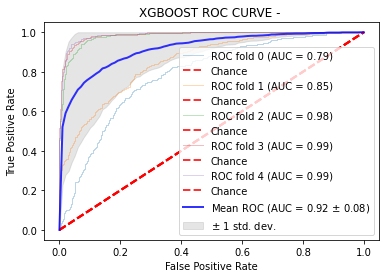

In [79]:
fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    #do smote
    smote = SMOTE(random_state=0)
    X_train,y_train = smote.fit_sample(X[train],y[train])
    
    classifier.fit(X_train, y_train)
    viz = plot_roc_curve(classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="XGBOOST ROC CURVE - ")
ax.legend(loc="lower right")
plt.show()